# __Abstract__

In this notebook, I (Muhammad) will perform necessary data preprocessing techniques on the []() dataset. This notebook is divided into two parts:

- Data Cleaning
- Data Preparation

Although these two parts are under the same umbrella: Data Preprocessing, I like to seperate them for convenience of the reader(s).

In Data Cleaning, I will inspect, visualize, and analyze the dataset - removing and adding necessary stuffs (as necessary) whilst doing so. On the other hand, Data Preparation will involve preprocessing techniques meant to prepare the data to be used by ML algorithms. In particular, this is the part where I split the dataset for training, validation, and testing, perform normalization, finishing fixes (like fixing data imbalanceness), etc.

For each part, I will provide a brief summary of what I did, again, for the convenience of the reader(s) who is/are interested in just the "what" I did but not "how" and "why" I did it.

# __Data Cleaning__

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To suppress annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("dataset_raw/transaction_dataset.csv")
print(df.shape)

(9841, 51)


In [7]:
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


The first two columns, `index` and `Address`, won't help us to build a good model - they're unncessary (a random, unique, and cannot-be-regenerated feature like `Address` is useless in helping us model a distribution. i.e: I am saying, even a superior distribution like Normal, which is almost always valid to be used as an assumed distribution on a random variable, is not even feasible for this feature)

In [8]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)
df.drop('Index', axis=1, inplace=True)

Let's take a look at what we have here so far, ladies and gents.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

Okay, looks like we have two features which are of `object` type. Let's convert these features to `category` type for computational efficiency.

But why converting to `category` type increase computational efficiency, you asked?

Basically, converting `object` variables to `category` datatype is a useful optimization technique for pandas dataframe (note that it is unnecessary in this case since our dataset is not too large, __but the point is to make good coding practices a habit__).

This is because, in pandas, the `object` data type is used to represent columns with strings, which can be very memory-intensive and slower to process compared to other data types. When you convert these columns to the `category` data type, pandas internally stores the unique values in a separate array and replaces the original strings with integer codes, which can lead to significant memory savings and faster computation.

In [13]:
categories = df.select_dtypes('O').columns.astype('category')
df[categories] = df[categories].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   FLAG                                                  9841 non-null   int64   
 1   Avg min between sent tnx                              9841 non-null   float64 
 2   Avg min between received tnx                          9841 non-null   float64 
 3   Time Diff between first and last (Mins)               9841 non-null   float64 
 4   Sent tnx                                              9841 non-null   int64   
 5   Received Tnx                                          9841 non-null   int64   
 6   Number of Created Contracts                           9841 non-null   int64   
 7   Unique Received From Addresses                        9841 non-null   int64   
 8   Unique Sent To Addresses                        

Missing values in data is not a good thing to have. There are many ways to resolve this, but first let's take a look at our data if it has this issue:

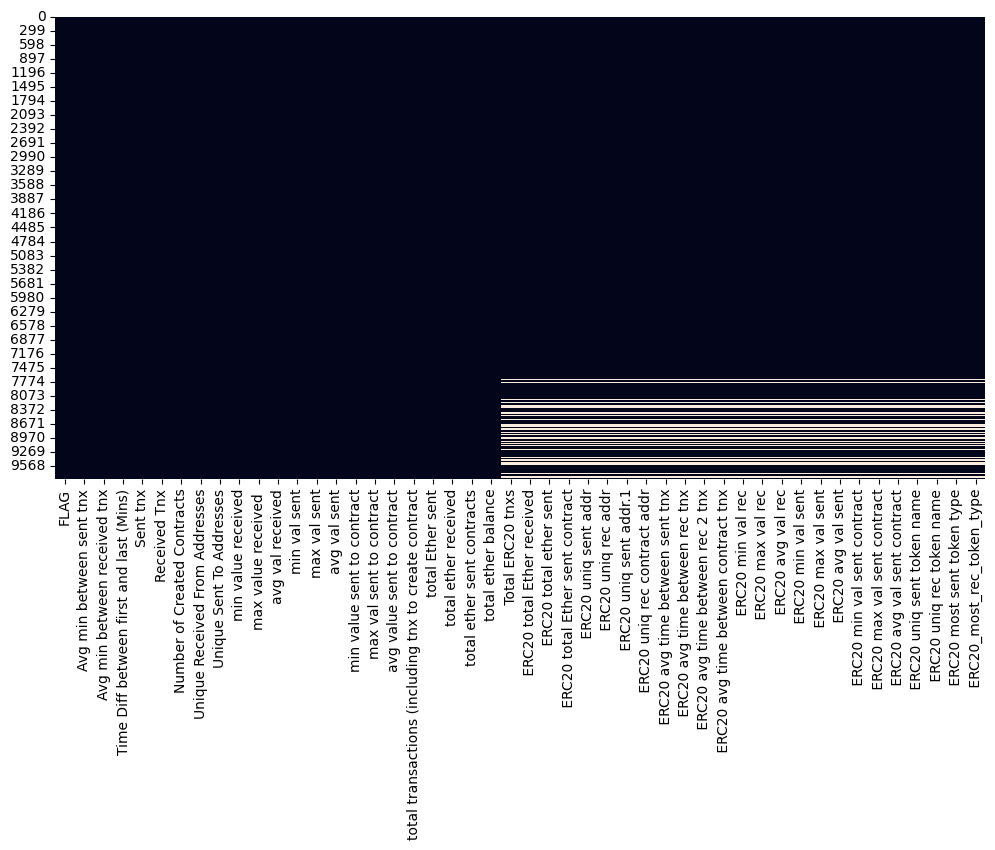

In [15]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

The white cells represent missing values (but why, you asked. Because the default color map used by the `sns.heatmap` function treats a `True` value as `1` and a `False` value as `0`. Since the `isnull()` function of a Pandas dataframe returns a boolean dataframe with `True` values where there are `NaNs` and `False` values otherwise, the `NaN` values are represented as `1` or `True` values in the boolean dataframe. Therefore, when the `sns.heatmap` function receives this boolean dataframe as input, the `True` values are colored white by default).

We can also find out the total number of missing values by using `df.isna().sum()` which sums over the total number of missing values of ever column and display them as a table:

In [16]:
df.isna().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

The last two features `ERC20 most sent token type` and `ERC20_most_rec_token_type` has the most number of missing values, let's get rid of these guys entirely (we probably get rid all of the ones with 829 too, we'll see how it goes. But for now, let's remove these two first).

Another reason why I propose/choose to remove these two features is because of the number of unique values they have:

In [17]:
print("No. of unique values for - ERC20 most sent token type: " + str(len(df[' ERC20 most sent token type'].value_counts())))
print("No. of unique values for - ERC20_most_rec_token_type: " + str(len(df[' ERC20_most_rec_token_type'].value_counts())))

No. of unique values for - ERC20 most sent token type: 305
No. of unique values for - ERC20_most_rec_token_type: 467


These are a lot of unique values for a feature which means they does little to nothing help, but only increase the complexity of our model.

However, we might need them for our analysis - in which case we can perform one-hot-encoding technique on them (or other techniques). But that's a story for later, we can always go back and bring these features back in.

In [18]:
df.drop(' ERC20 most sent token type', axis=1, inplace=True)
df.drop(' ERC20_most_rec_token_type', axis=1, inplace=True)

Now, let's fill the missing values for each features `f` with the median of `f`:

In [19]:
df.fillna(df.median(), inplace=True)

Let's visualize it again:

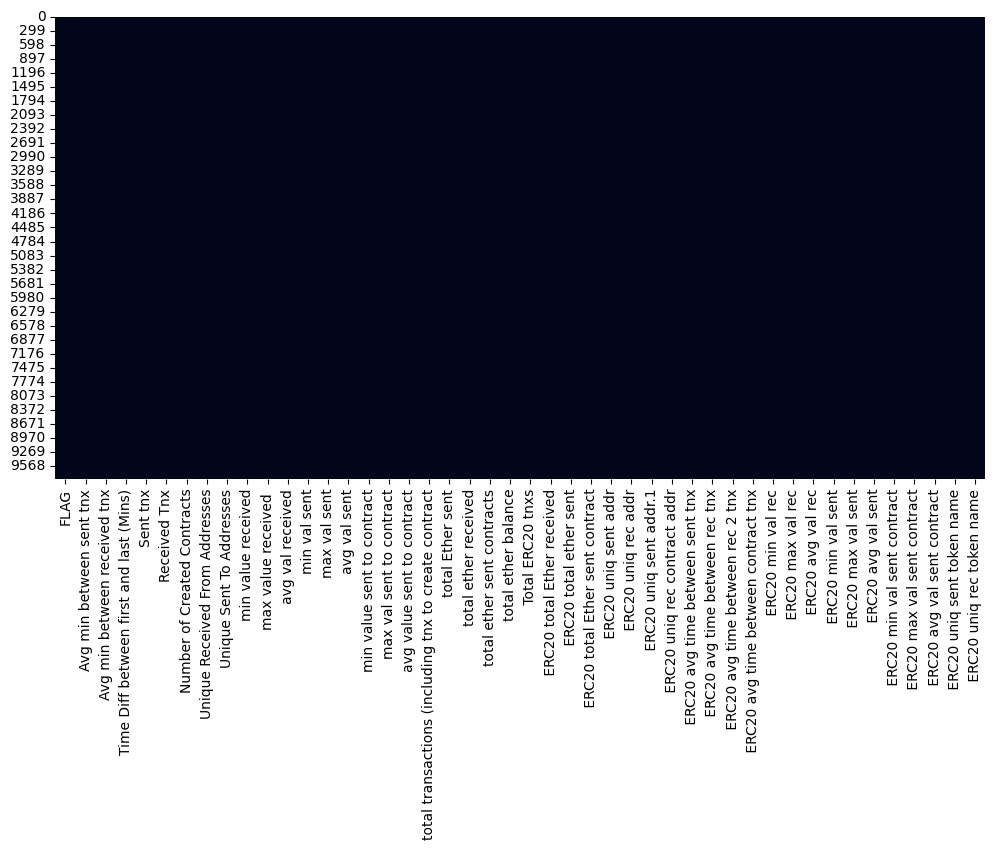

In [20]:
# Visualize missings pattern of the dataframe
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Next, we'd like to get rid of features with variance of 0 (or very small). Why? Because they may not contribute to the model we're building. If features `f1` and `f2`, for example, have zero variance, that basically imply all the values are same or almost the same - this does not bring any "meanings". i.e: these two features can be dropped without any negative impact on the model to be built.

So, let's remove features with 0 variance and remove them.

In [21]:
# Find out which features have 0 variance
df.var()[df.var() == 0]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [22]:
# Remove them
variance_zero_features = df.var() == 0
df.drop(df.var()[variance_zero_features].index, axis = 1, inplace = True)
df.shape

(9841, 39)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 39 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

The next good thing to do is remove highly correlated features. Why? A group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors. But why "A group of highly correlated features will not bring additional information (or just very few)"? Because if `f1` is highly correlated with `f2`, then why need to use both of them? Why don't just one of them? Or discard both of them?

First, let's find out which features are highly correlated by plotting a heatmap:

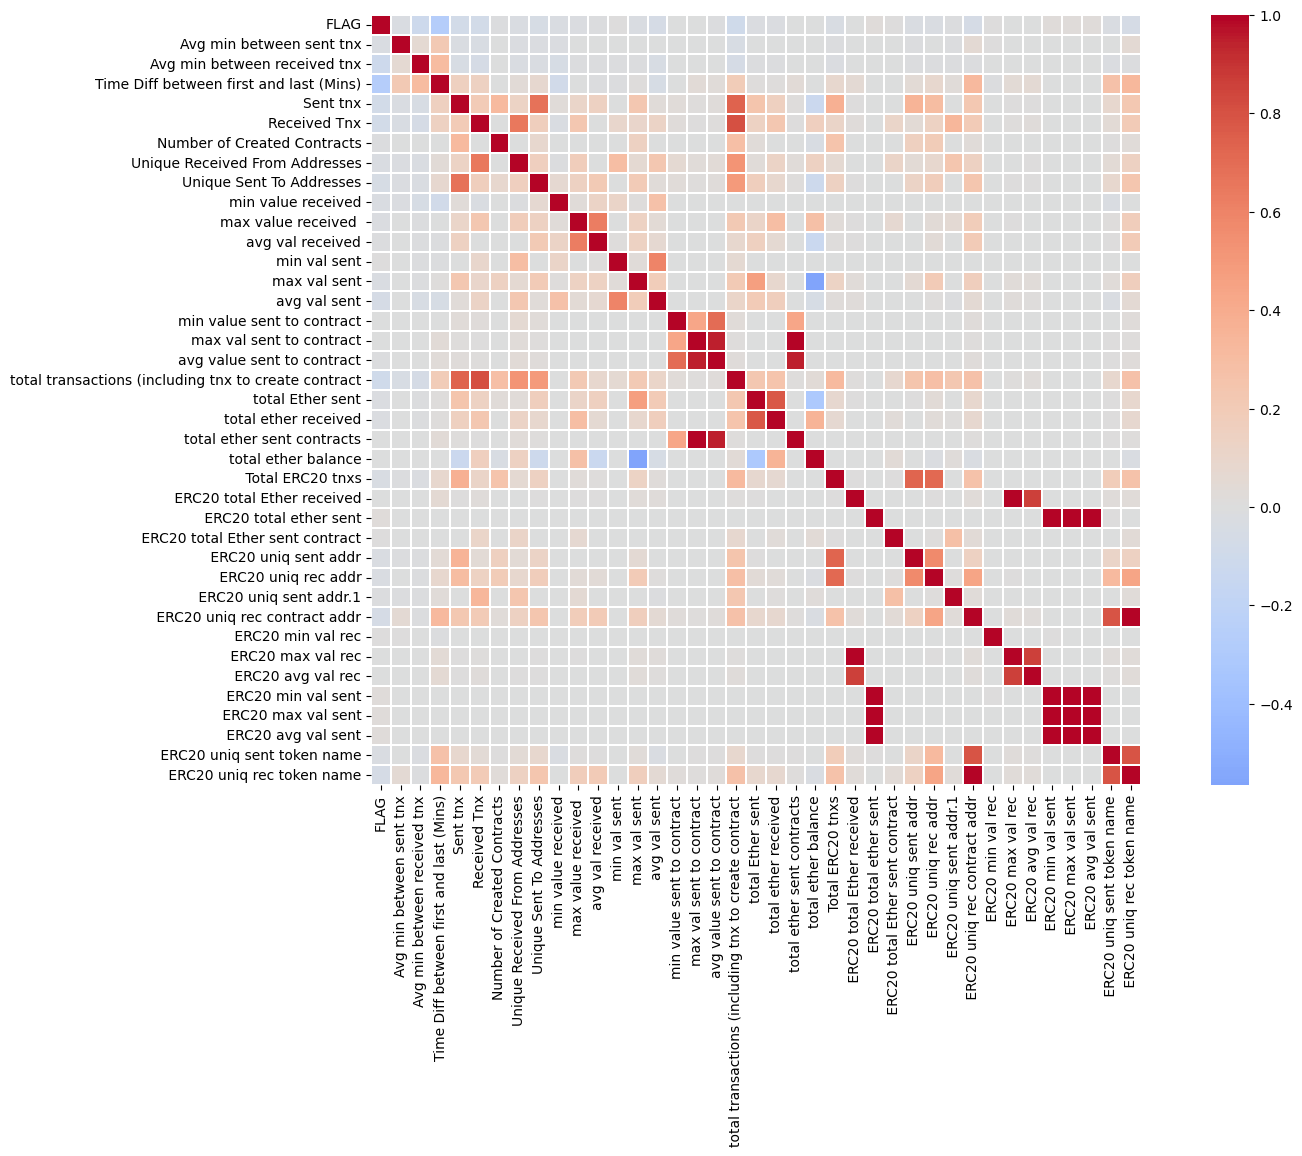

In [17]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.1, square=True)
plt.show()

Let's drop the highly correlated features

In [18]:
drop = ['total transactions (including tnx to create contract',\
        'total ether sent contracts',\
        'max val sent to contract',\
        ' ERC20 avg val rec',\
        ' ERC20 max val rec',\
        ' ERC20 min val rec',\
        ' ERC20 uniq rec contract addr',\
        'max val sent',\
        ' ERC20 avg val sent',\
        ' ERC20 min val sent',\
        ' ERC20 max val sent',\
        ' Total ERC20 tnxs',\
        'avg value sent to contract',\
        'Unique Sent To Addresses',\
        'Unique Received From Addresses',\
        'total ether received',\
        ' ERC20 uniq sent token name',\
        'min value received', 
        'min val sent',\
        ' ERC20 uniq rec addr']
df.drop(drop, axis=1, inplace=True)

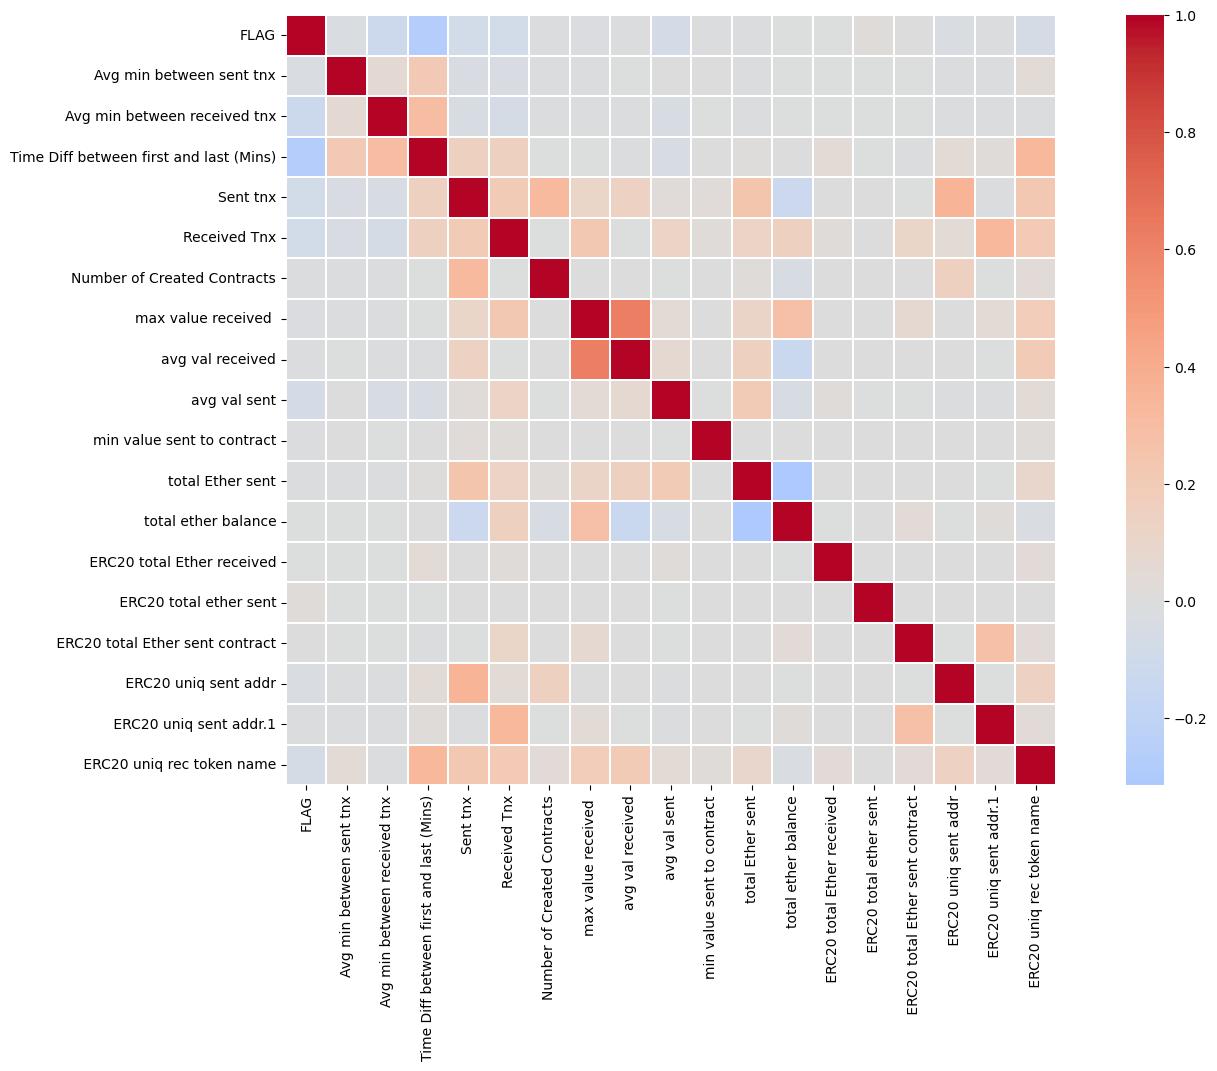

In [19]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.1, square=True)
plt.show()

There might be some featurees with values mostly 0's, let's find them and get rid of them.

In [20]:
def percentage_of_zeros(df):
    pz = {}
    for c in df.columns[1:]: # Exclue `FLAG`
        percent_zero = ((df[c] == 0).sum() / len(df[c])) * 100
        pz[c] = percent_zero
    return pz

percent_zero = percentage_of_zeros(df)
for c, p in percent_zero.items():
    print("Column: {}, Percentage of zeros: {}%".format(c, round(p, 2)))

Column: Avg min between sent tnx, Percentage of zeros: 35.79%
Column: Avg min between received tnx, Percentage of zeros: 28.75%
Column: Time Diff between first and last (Mins), Percentage of zeros: 6.41%
Column: Sent tnx, Percentage of zeros: 20.48%
Column: Received Tnx, Percentage of zeros: 5.6%
Column: Number of Created Contracts, Percentage of zeros: 86.22%
Column: max value received , Percentage of zeros: 7.18%
Column: avg val received, Percentage of zeros: 7.2%
Column: avg val sent, Percentage of zeros: 21.0%
Column: min value sent to contract, Percentage of zeros: 99.98%
Column: total Ether sent, Percentage of zeros: 21.0%
Column: total ether balance, Percentage of zeros: 7.07%
Column:  ERC20 total Ether received, Percentage of zeros: 45.12%
Column:  ERC20 total ether sent, Percentage of zeros: 84.09%
Column:  ERC20 total Ether sent contract, Percentage of zeros: 99.72%
Column:  ERC20 uniq sent addr, Percentage of zeros: 84.09%
Column:  ERC20 uniq sent addr.1, Percentage of zeros

Let's get the columns with percentage of zero greater than 90%:

In [21]:
mostly_zeros_features = [c for c, p in percent_zero.items() if p>90]

In [22]:
df.drop(mostly_zeros_features, axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   max value received                       9841 non-null   float64
 8   avg val received                         9841 non-null   float64
 9   avg val sent                             9841 non-null   float64
 10  total Ether sent                         9841 no

# __Data Prepration__

First, let's split the dataset into features `X` and labels `y`.

In [24]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]
print("X.shape:", X.shape)
print("y.shape:", y.shape)

X.shape: (9841, 15)
y.shape: (9841,)


In [25]:
from sklearn.model_selection import train_test_split

# Let's use the conventional 80-20 rule, I believe it fits for
# this dataset considering we have close to 10k datapoints
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2
)
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (7872, 15)
y_train.shape: (7872,)
X_test.shape: (1969, 15)
y_test.shape: (1969,)


Next, I would like to transform the data to make it behave like a Gaussian distribution. This justification makes sense because by the law of large numbers, most random natural phenomenon approach the gaussian distribution - I would expect the same for crypto (lol).

To do that, we can use [PowerTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) by sklearn:

In [26]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer()
X_train = PT.fit_transform(X_train)

Next, we can see that our data is imbalanced:

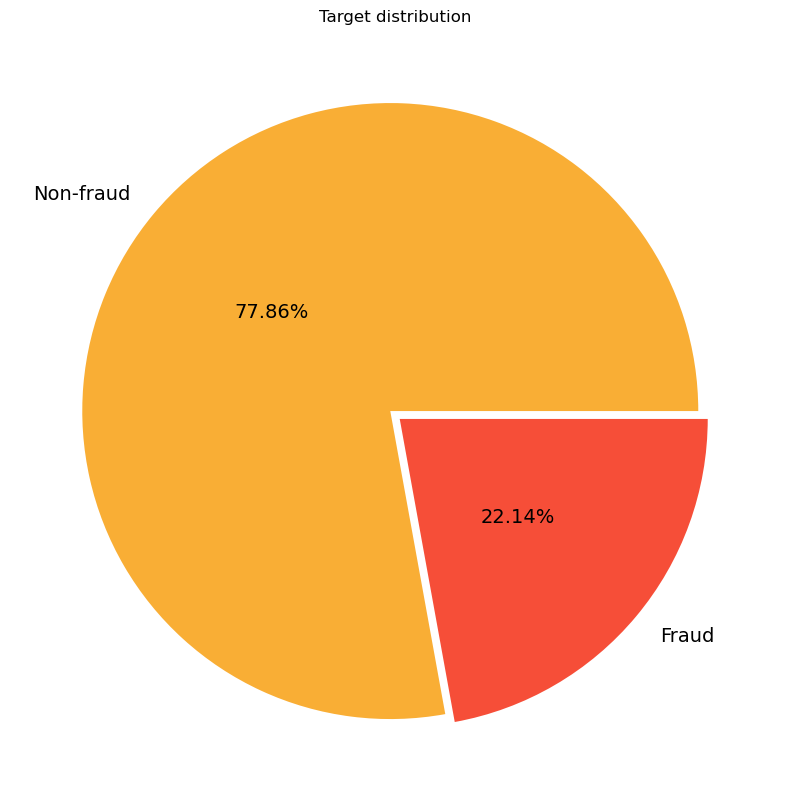

In [27]:
pie, ax = plt.subplots(figsize=[15,10])
labels = ['Non-fraud', 'Fraud']
colors = ['#f9ae35', '#f64e38']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 14}, colors = colors)
plt.title('Target distribution')
plt.show()

We can fix this with [SMTOE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/) (TODO: Explain briefly SMOTE). First, we need to install `imblearn`

In [28]:
!python -m pip install --user imblearn

In [29]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)

X_train.shape: (12242, 15)
y_train.shape: (12242,)


In [30]:
print("Before applying SMOTE:")
print("Number of non-frauds:", df['FLAG'].value_counts()[0])
print("Number of non-frauds:", df['FLAG'].value_counts()[1])

print("")

print("After applying SMOTE:")
print("Number of non-frauds:", sum(np.array(y_train)==0))
print("Number of frauds:", sum(np.array(y_train)==1))

Before applying SMOTE:
Number of non-frauds: 7662
Number of non-frauds: 2179

After applying SMOTE:
Number of non-frauds: 6121
Number of frauds: 6121


# __Save the dataset__

In [31]:
# Save the training and testing data
np.save('dataset/X_train.npy', X_train)
np.save('dataset/X_test.npy', X_test)
np.save('dataset/y_train.npy', y_train)
np.save('dataset/y_test.npy', y_test)

# __Finding a good ML Algorithm to start with__

In [32]:
!python -m pip install --user lazypredict

In [33]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|███████████████████████████████████████████| 29/29 [00:24<00:00,  1.20it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.45               0.63     0.63      0.46   
AdaBoostClassifier                 0.83               0.63     0.63      0.80   
KNeighborsClassifier               0.84               0.63     0.63      0.80   
RandomForestClassifier             0.83               0.63     0.63      0.80   
ExtraTreesClassifier               0.84               0.63     0.63      0.80   
XGBClassifier                      0.83               0.63     0.63      0.80   
NuSVC                              0.82               0.60     0.60      0.77   
LabelSpreading                     0.82               0.60     0.60      0.77   
LabelPropagation                   0.82               0.60     0.60      0.77   
LGBMClassifier                     0.82               0.60     0.60      0.77   
SVC                         